In [1]:
import torch
import matplotlib.pyplot as plt
import pytorch_lightning as pl

from vqvae.vqvae import CifarVQVAE
from vqvae.trainer import LITVqvae

import scripts.dataset.cifar as script

# Reload python packages when changed
%load_ext autoreload
%autoreload 2

# Matplotlib defaults
plt.rcParams.update({
    "font.size": 25,
    "figure.figsize": (25, 5)
})

class args:
    batch_size=16
    num_workers=4

In [2]:
# Load validation dataset
dataloader_val = script.get_dataloader(args, split="val")
# Load model from checkpoint
litmodule = LITVqvae.load_from_checkpoint("checkpoints/vqvae-cifar_2022_01_29__121747/epoch=2-step=9374.ckpt", model=script.model)
# Load trainer for evaluation loop
trainer = pl.Trainer(gpus=[0])

Files already downloaded and verified


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


## Reconstructions

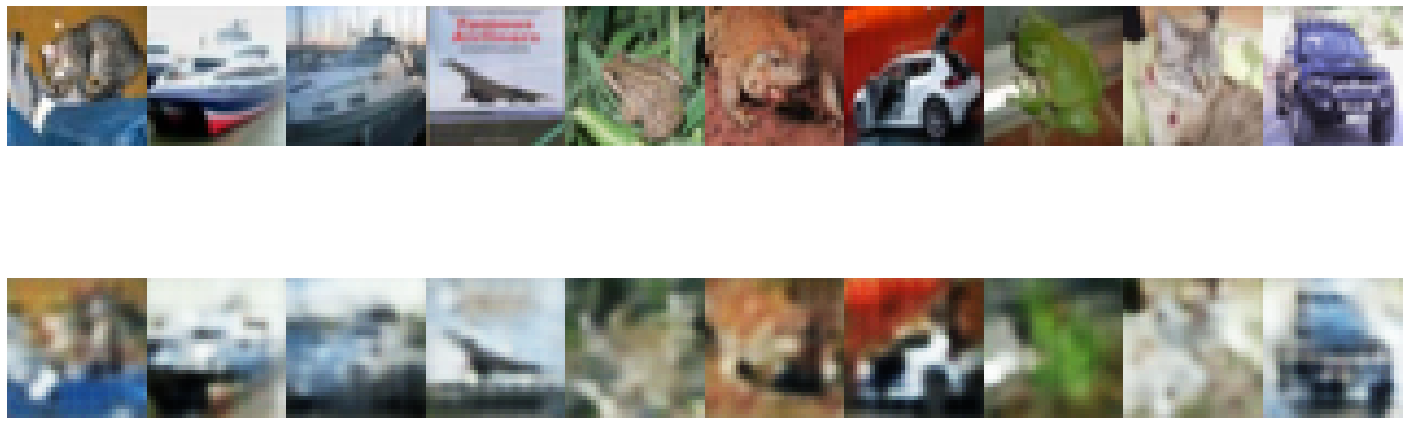

In [3]:
n_images = 10

for images in dataloader_val:
    break
images = images[:n_images]
with torch.no_grad():
    reconstructions = script.model(images)
    
# fig, axes = plt.subplots(nrows=2, ncols=n_images)
fig = plt.figure(figsize=(25, 10))
for idx, (image, reconstruction) in enumerate(zip(images, reconstructions)):
    plt.subplot(2, n_images, idx+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")
    
    plt.subplot(2, n_images, n_images+idx+1)
    plt.imshow(reconstruction.permute(1, 2, 0))
    plt.axis("off")

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [4]:
trainer.validate(litmodule, dataloader_val)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validating:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 621/625 [00:08<00:00, 85.51it/s]--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_reconstruction_loss': 0.0059648724272847176}
--------------------------------------------------------------------------------


[{'val_reconstruction_loss': 0.0059648724272847176}]